In [4]:
## 引入包
import qutip
from qutip import *
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import matplotlib.ticker as ticker
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

import arc #Import ARC (Alkali Rydberg Calculator)
from arc import *
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.6.2
Numpy Version:      1.21.4
Scipy Version:      1.7.3
Cython Version:     0.29.25
Matplotlib Version: 3.1.0
Python Version:     3.7.3
Number of CPUs:     6
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Windows (AMD64)
Installation path:  D:\Download\programme\Anaconda\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.ci

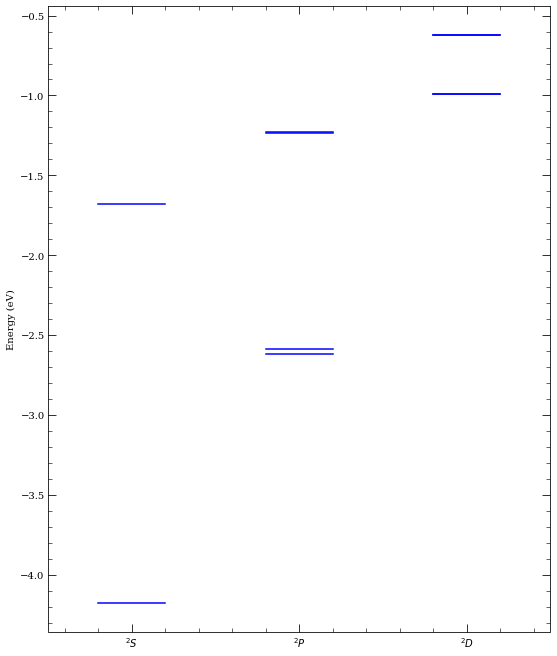

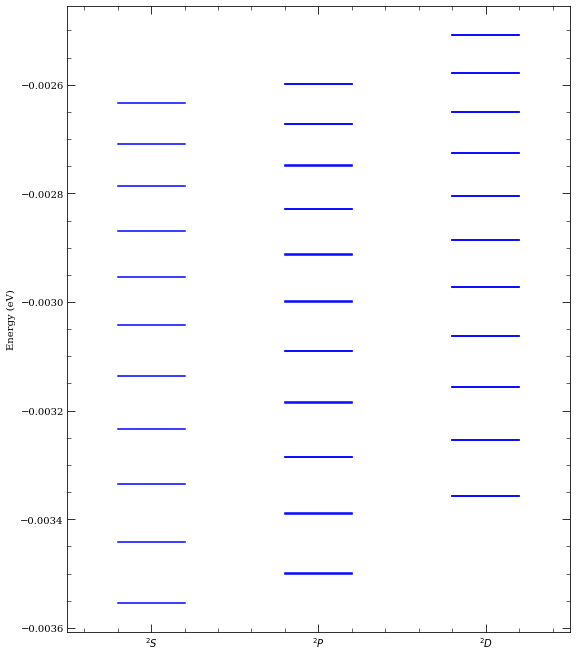

In [70]:
atom= Rubidium87()


nmin=5  #Minimum n
nmax=6 #Maximum n
lmin=0  #Minimum l
lmax=2  #Maxmium l

#Plot energy levels of Rb87 ground state and intermidiate state
levels1 = LevelPlot(atom)
levels1.makeLevels(nmin,nmax,lmin,lmax)
levels1.drawLevels()
levels1.showPlot()
#Plot energy levels of Rb87 Rydberg states 
levels2 = LevelPlot(atom)
levels2.makeLevels(65,75,lmin,lmax)
levels2.drawLevels()
levels2.showPlot()

The life time of 70S_1/2 is 3.75e-04 s. This value is larger when temperature is not zero.
The life time of 60P_3/2 is 1.1814e-07 s


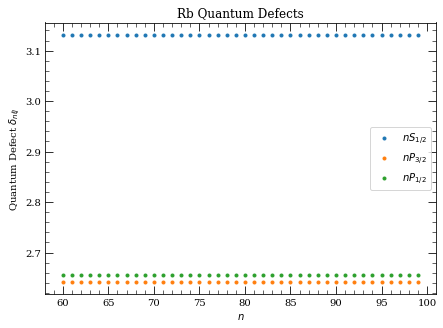

In [71]:
n=np.arange(60,100,1)

#Plot Quantum Defects of Cs
fig, axes = plt.subplots(1, 1, figsize=(7,5))

axes.plot(n,atom.getQuantumDefect(n,0,0.5),'.',label="$nS_{1/2}$")
axes.plot(n,atom.getQuantumDefect(n,1,1.5),'.',label="$nP_{3/2}$")
axes.plot(n,atom.getQuantumDefect(n,1,0.5),'.',label="$nP_{1/2}$")
axes.legend(loc=0)
axes.set_xlabel('$n$')
axes.set_ylabel('Quantum Defect $\delta_{n\ell j}$')
axes.set_title('Rb Quantum Defects')

print("The life time of 70S_1/2 is %.2e s. This value is larger when temperature is not zero." % (atom.getStateLifetime(70,0,0.5)))
print("The life time of 60P_3/2 is %.4e s" % (atom.getStateLifetime(6,1,1.5)) )

In [73]:
print("Rb Excitation 6S_{1/2} -> 6P_{3/2}")
n1 = 5; l1 = 0; j1 = 0.5; #Initial State
n2 = 6; l2 = 1; j2 = 1.5; #Int State
print("lambda = %.3f nm" % (atom.getTransitionWavelength(n1,l1,j1,n2,l2,j2)*1e9))
print("omega/2pi = %.3f THz" % (atom.getTransitionFrequency(n1,l1,j1,n2,l2,j2)*1e-12))
print(" ")
print("Rb Excitation 6P_{3/2} -> 70S_{1/2}")
n3 = 70; l3 = 0; j3 = 0.5; #Final State
print("lambda = %.3f nm" % (atom.getTransitionWavelength(n2,l2,j2,n3,l3,j3)*1e9))
print("omega/2pi = %.3f THz" % (atom.getTransitionFrequency(n2,l2,j2,n3,l3,j3)*1e-12))

Rb Excitation 6S_{1/2} -> 6P_{3/2}
lambda = 420.299 nm
omega/2pi = 713.284 THz
 
Rb Excitation 6P_{3/2} -> 70S_{1/2}
lambda = 1012.794 nm
omega/2pi = 296.005 THz


### A display showing that atom number decays to 1/e when at lifetime, 80 us

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]


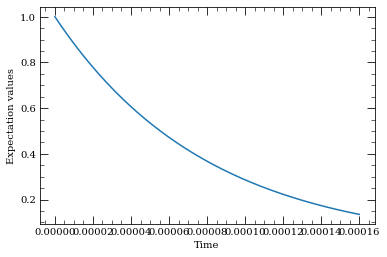

In [477]:
Htest =2*np.pi * 0* sigmax() #This Hamiltonian is actually H/hbar, checked
print(Htest)
psi0test = basis(2, 1)
rho_00test=basis(2,1)*basis(2,1).dag() # atom number in the upper spin state
sigmaplus=basis(2,0)*basis(2,1).dag()
sigmaminus=basis(2,1)*basis(2,0).dag()
timestest = np.linspace(0.0, 160e-6, 160) 
lifetimetest=80e-6
resulttest = mesolve(Htest, psi0test, timestest, [np.sqrt(1/lifetimetest) * sigmaplus], [rho_00test])
fig, ax = plt.subplots()
ax.plot(timestest, resulttest.expect[0]) 
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
plt.show() 
#print(result.expect)

# 2. A display using the states in Antoine, 2018.

In [428]:
# In Antoine,2018 they used 795 nm and 475 nm, there are multiple decay channels from inte state.
g_prime=basis(5,0)
g=basis(5,1)
inte=basis(5,2)
r=basis(5,3)
r_prime=basis(5,4)
psi0=g 
rho_00=g*g.dag()
rho_rr=r*r.dag()
rho_gpgp=g_prime*g_prime.dag()
rho_ee=inte*inte.dag()
Decay1=g*inte.dag()
Decay2=g_prime*inte.dag()
Gamma_795=2*np.pi*5.746e6


## 2.1 Reproduce Fig 6 in Antoine, 2018

In [443]:
Delta1=740e6
Omega_ge1=100e6
Omega_er1=30e6 
H1=2*np.pi*(Delta1*inte*inte.dag()+Omega_ge1/2.0*(g*inte.dag()+inte*g.dag())+Omega_er1/2*(inte*r.dag()+r*inte.dag())+(Omega_er1**2-Omega_ge1**2)/4/Delta1*r*r.dag())
print(H1/2/np.pi)

Quantum object: dims = [[5], [5]], shape = (5, 5), type = oper, isherm = True
Qobj data =
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.00000000e+07  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+07  7.40000000e+08  1.50000000e+07
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.50000000e+07 -3.07432432e+06
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]


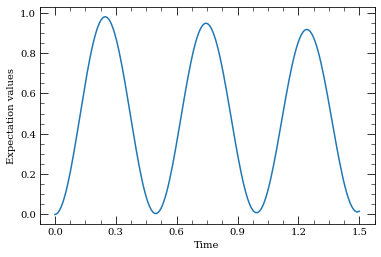

[0.         0.0023445  0.00881685 0.02034274 0.03572196 0.05507544
 0.07931509 0.10623284 0.1372289  0.17176962 0.20823684 0.24826525
 0.29010094 0.33337007 0.37889899 0.42469986 0.47128687 0.51840254
 0.56461728 0.6106157  0.65543701 0.69843287 0.73995263 0.77890736
 0.81521829 0.84879404 0.87882422 0.9054646  0.92836008 0.94710919
 0.96187036 0.97227376 0.97826104 0.97992534 0.97705711 0.96981002
 0.95825547 0.94240408 0.92251556 0.89871303 0.87120138 0.84029327
 0.80621031 0.76928992 0.72988233 0.68831083 0.64498412 0.60028526
 0.55460931 0.50838907 0.46202818 0.41594879 0.37057359 0.32630168
 0.28353837 0.24266755 0.20405193 0.1680427  0.13495859 0.10509466
 0.07871838 0.05606085 0.03732288 0.02266803 0.01222203 0.00607366
 0.00427141 0.00682497 0.01370404 0.02483944 0.04012338 0.05941001
 0.08251843 0.10923207 0.13930244 0.17245136 0.20837174 0.24673297
 0.28718225 0.32934749 0.37284286 0.41726975 0.46222173 0.50728896
 0.55205963 0.59612616 0.63908769 0.68055305 0.72014629 0.7575

In [470]:
times1 = np.linspace(0,1.5e-6,200) 
result1 = mesolve(H1, psi0, times1,[np.sqrt(Gamma_795/3)*Decay1,np.sqrt(Gamma_795*2/3)*Decay2], [rho_rr])
fig1, ax1 = plt.subplots()
ax1.plot(times1*1e6, result1.expect[0])

ax1.set_xlabel('Time') 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.3))
ax1.set_ylabel('Expectation values') 
plt.show() 
print(result1.expect[0])

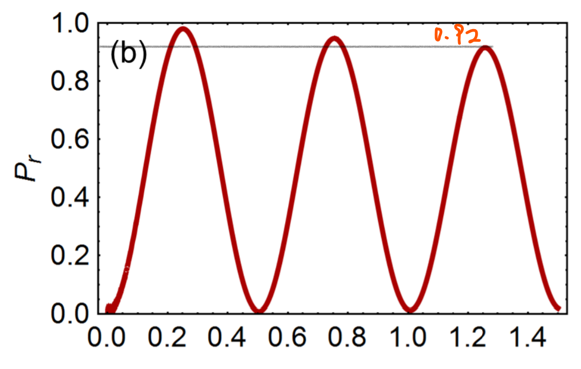

### From their Fig 6b, the last peak is around 0.92. And in my code it is about 0.917. Verified my code!

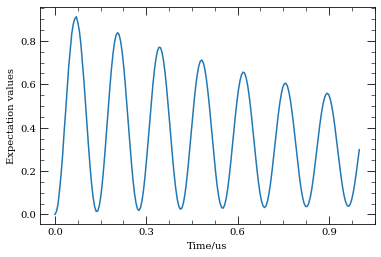

[0.         0.01335007 0.04586748 0.10844801 0.18226554 0.26982415
 0.37794814 0.47382095 0.58072771 0.68016522 0.75650349 0.83316101
 0.87809315 0.90229284 0.91173049 0.88507678 0.84518138 0.78380167
 0.70043239 0.61229752 0.51099467 0.40833164 0.31092283 0.21789627
 0.13985293 0.07770963 0.03465157 0.01389463 0.01535649 0.0392482
 0.08343944 0.1467842  0.22412614 0.31218466 0.406948   0.50114779
 0.59236758 0.6743848  0.7424005  0.79498772 0.82705349 0.83835711
 0.82866657 0.79704457 0.74697317 0.68011895 0.59993008 0.51150635
 0.41844043 0.32616035 0.23940428 0.16223579 0.0989831  0.05254722
 0.02523778 0.01833309 0.0319706  0.0652608  0.11622636 0.1821634
 0.25930833 0.34361145 0.4306067  0.51550143 0.5940484  0.66199232
 0.71578283 0.75281144 0.7710004  0.76959701 0.74875442 0.70952058
 0.65415193 0.5855003  0.50718446 0.42336673 0.33832264 0.25649423
 0.18207514 0.11881705 0.06992741 0.0377905  0.02392407 0.0288788
 0.05221967 0.09255477 0.14760612 0.21436881 0.28920981 0.3681258

In [567]:
Delta2=477e6
Omega_ge2=210e6
Omega_er2=35e6 
H2=2*np.pi*(Delta2*inte*inte.dag()+Omega_ge2/2*(g*inte.dag()+inte*g.dag())+Omega_er2/2*(inte*r.dag()+r*inte.dag())+(Omega_er2**2-Omega_ge2**2)/4/Delta2*r*r.dag())

times2 = np.linspace(0,1e-6,200) 
result2 = mesolve(H2, psi0, times2,[np.sqrt(Gamma_795/3)*Decay1,np.sqrt(Gamma_795*2/3)*Decay2], [rho_rr])
fig2, ax2 = plt.subplots()

ax2.plot(times2*1e6, result2.expect[0])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.3))
ax2.set_xlabel('Time/us') 
ax2.set_ylabel('Expectation values') 
plt.show() 
print(result2.expect[0])

### Again, in my code the last peak is 0.5589081, while the value is about 0.55 in Fig 6d. Verified the code again. 

## 2.2 A display of the Doppler effect

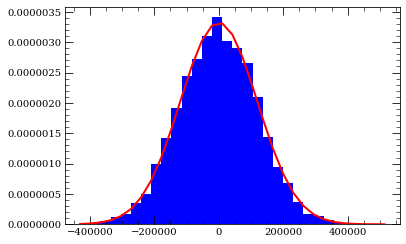

In [5]:
sigma=120e3
test=np.random.normal(0,sigma,10000)
count, bins, ignored= plt.hist(test,30,density=True, color='b')

plt.plot(bins,1/sigma/np.sqrt(2*np.pi)*np.exp(-bins**2/2/sigma**2),linewidth=2,color='r')
plt.show()

In [2]:
times3 = np.linspace(0,12e-6,1000) 
x=np.zeros(1000)
for i in range(200):
    Delta3=800e6
    Omega_ge3=20e6
    Omega_er3=20e6 
    sigma=1.2e5
    delta_D=np.random.normal(0,sigma)
    #delta_D=0
    H3=2*np.pi*(delta_D*rho_00+Delta3*inte*inte.dag()+Omega_ge3/2.0*(g*inte.dag()+inte*g.dag())+Omega_er3/2*(inte*r.dag()+r*inte.dag())+(Omega_er3**2-Omega_ge3**2)/4/Delta3*r*r.dag())
    result3 = mesolve(H3, psi0, times3,[], [rho_rr])
    #fig3, ax3 = plt.subplots()

    #ax3.plot(times3*1e6, result3.expect[0])
    #ax3.xaxis.set_major_locator(ticker.MultipleLocator(3))
    #ax3.set_xlabel('Time/us') 
    #ax3.set_ylabel('Expectation values') 
    #plt.show()
    x=np.vstack((result3.expect[0],x))
    #print(result3.expect[0])

NameError: name 'np' is not defined

In [614]:
x

array([[0.00000000e+00, 9.09331714e-05, 3.49780290e-04, ...,
        6.60511663e-01, 6.66400344e-01, 6.72774056e-01],
       [0.00000000e+00, 9.09393771e-05, 3.49873924e-04, ...,
        1.23470887e-02, 1.44846366e-02, 1.68805315e-02],
       [0.00000000e+00, 9.09327170e-05, 3.49773459e-04, ...,
        7.22254544e-01, 7.25552979e-01, 7.29373968e-01],
       ...,
       [0.00000000e+00, 9.09363822e-05, 3.49828640e-04, ...,
        2.37986921e-02, 2.68142062e-02, 2.98665372e-02],
       [0.00000000e+00, 9.09375957e-05, 3.49846961e-04, ...,
        3.09394361e-05, 1.44071123e-05, 1.72630694e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

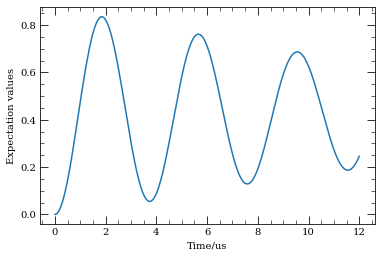

[0.00000000e+00 9.09373425e-05 3.49843353e-04 8.07420834e-04
 1.41883381e-03 2.21468150e-03 3.21319309e-03 4.32984868e-03
 5.68987292e-03 7.18601734e-03 8.83707771e-03 1.07443896e-02
 1.27122149e-02 1.49393502e-02 1.73284238e-02 1.98016756e-02
 2.25941069e-02 2.54114986e-02 2.84551462e-02 3.17298380e-02
 3.49978392e-02 3.86264612e-02 4.22910222e-02 4.60951325e-02
 5.02248657e-02 5.42684020e-02 5.86640867e-02 6.31636420e-02
 6.76761803e-02 7.26035025e-02 7.74087850e-02 8.24915320e-02
 8.77946326e-02 9.29739605e-02 9.86163203e-02 1.04167610e-01
 1.09857605e-01 1.15906436e-01 1.21722624e-01 1.27979686e-01
 1.34249143e-01 1.40476611e-01 1.47184791e-01 1.53615168e-01
 1.60380074e-01 1.67317815e-01 1.74028991e-01 1.81285247e-01
 1.88305389e-01 1.95477154e-01 2.03004538e-01 2.10161839e-01
 2.17839381e-01 2.25411704e-01 2.32905640e-01 2.40914124e-01
 2.48490210e-01 2.56459830e-01 2.64523002e-01 2.72276462e-01
 2.80632848e-01 2.88600067e-01 2.96743857e-01 3.05206154e-01
 3.13177804e-01 3.217353

In [624]:
average=np.sum(x,axis=0)/200
fig3, ax3 = plt.subplots()

ax3.plot(times3*1e6, average)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax3.set_xlabel('Time/us') 
ax3.set_ylabel('Expectation values') 
plt.show()
print(average)